<a href="https://colab.research.google.com/github/siddharth101/Double_suspension/blob/main/Pitch_Roll_Yaw_combined.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sympy import zeros, symbols
from sympy import eye, Matrix
import sympy.physics.mechanics as me
from sympy import expand
from sympy.parsing.sympy_parser import parse_expr
from sympy.physics.mechanics import Body, PinJoint, PrismaticJoint, JointsMethod, inertia
from sympy.physics.mechanics import dynamicsymbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, outer
from sympy.physics.mechanics import ReferenceFrame, Point, RigidBody
from sympy.physics.mechanics import kinetic_energy, potential_energy, Point, Particle

import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

smp.init_printing(use_latex='mathjax')

In [76]:
cv2_imshow?

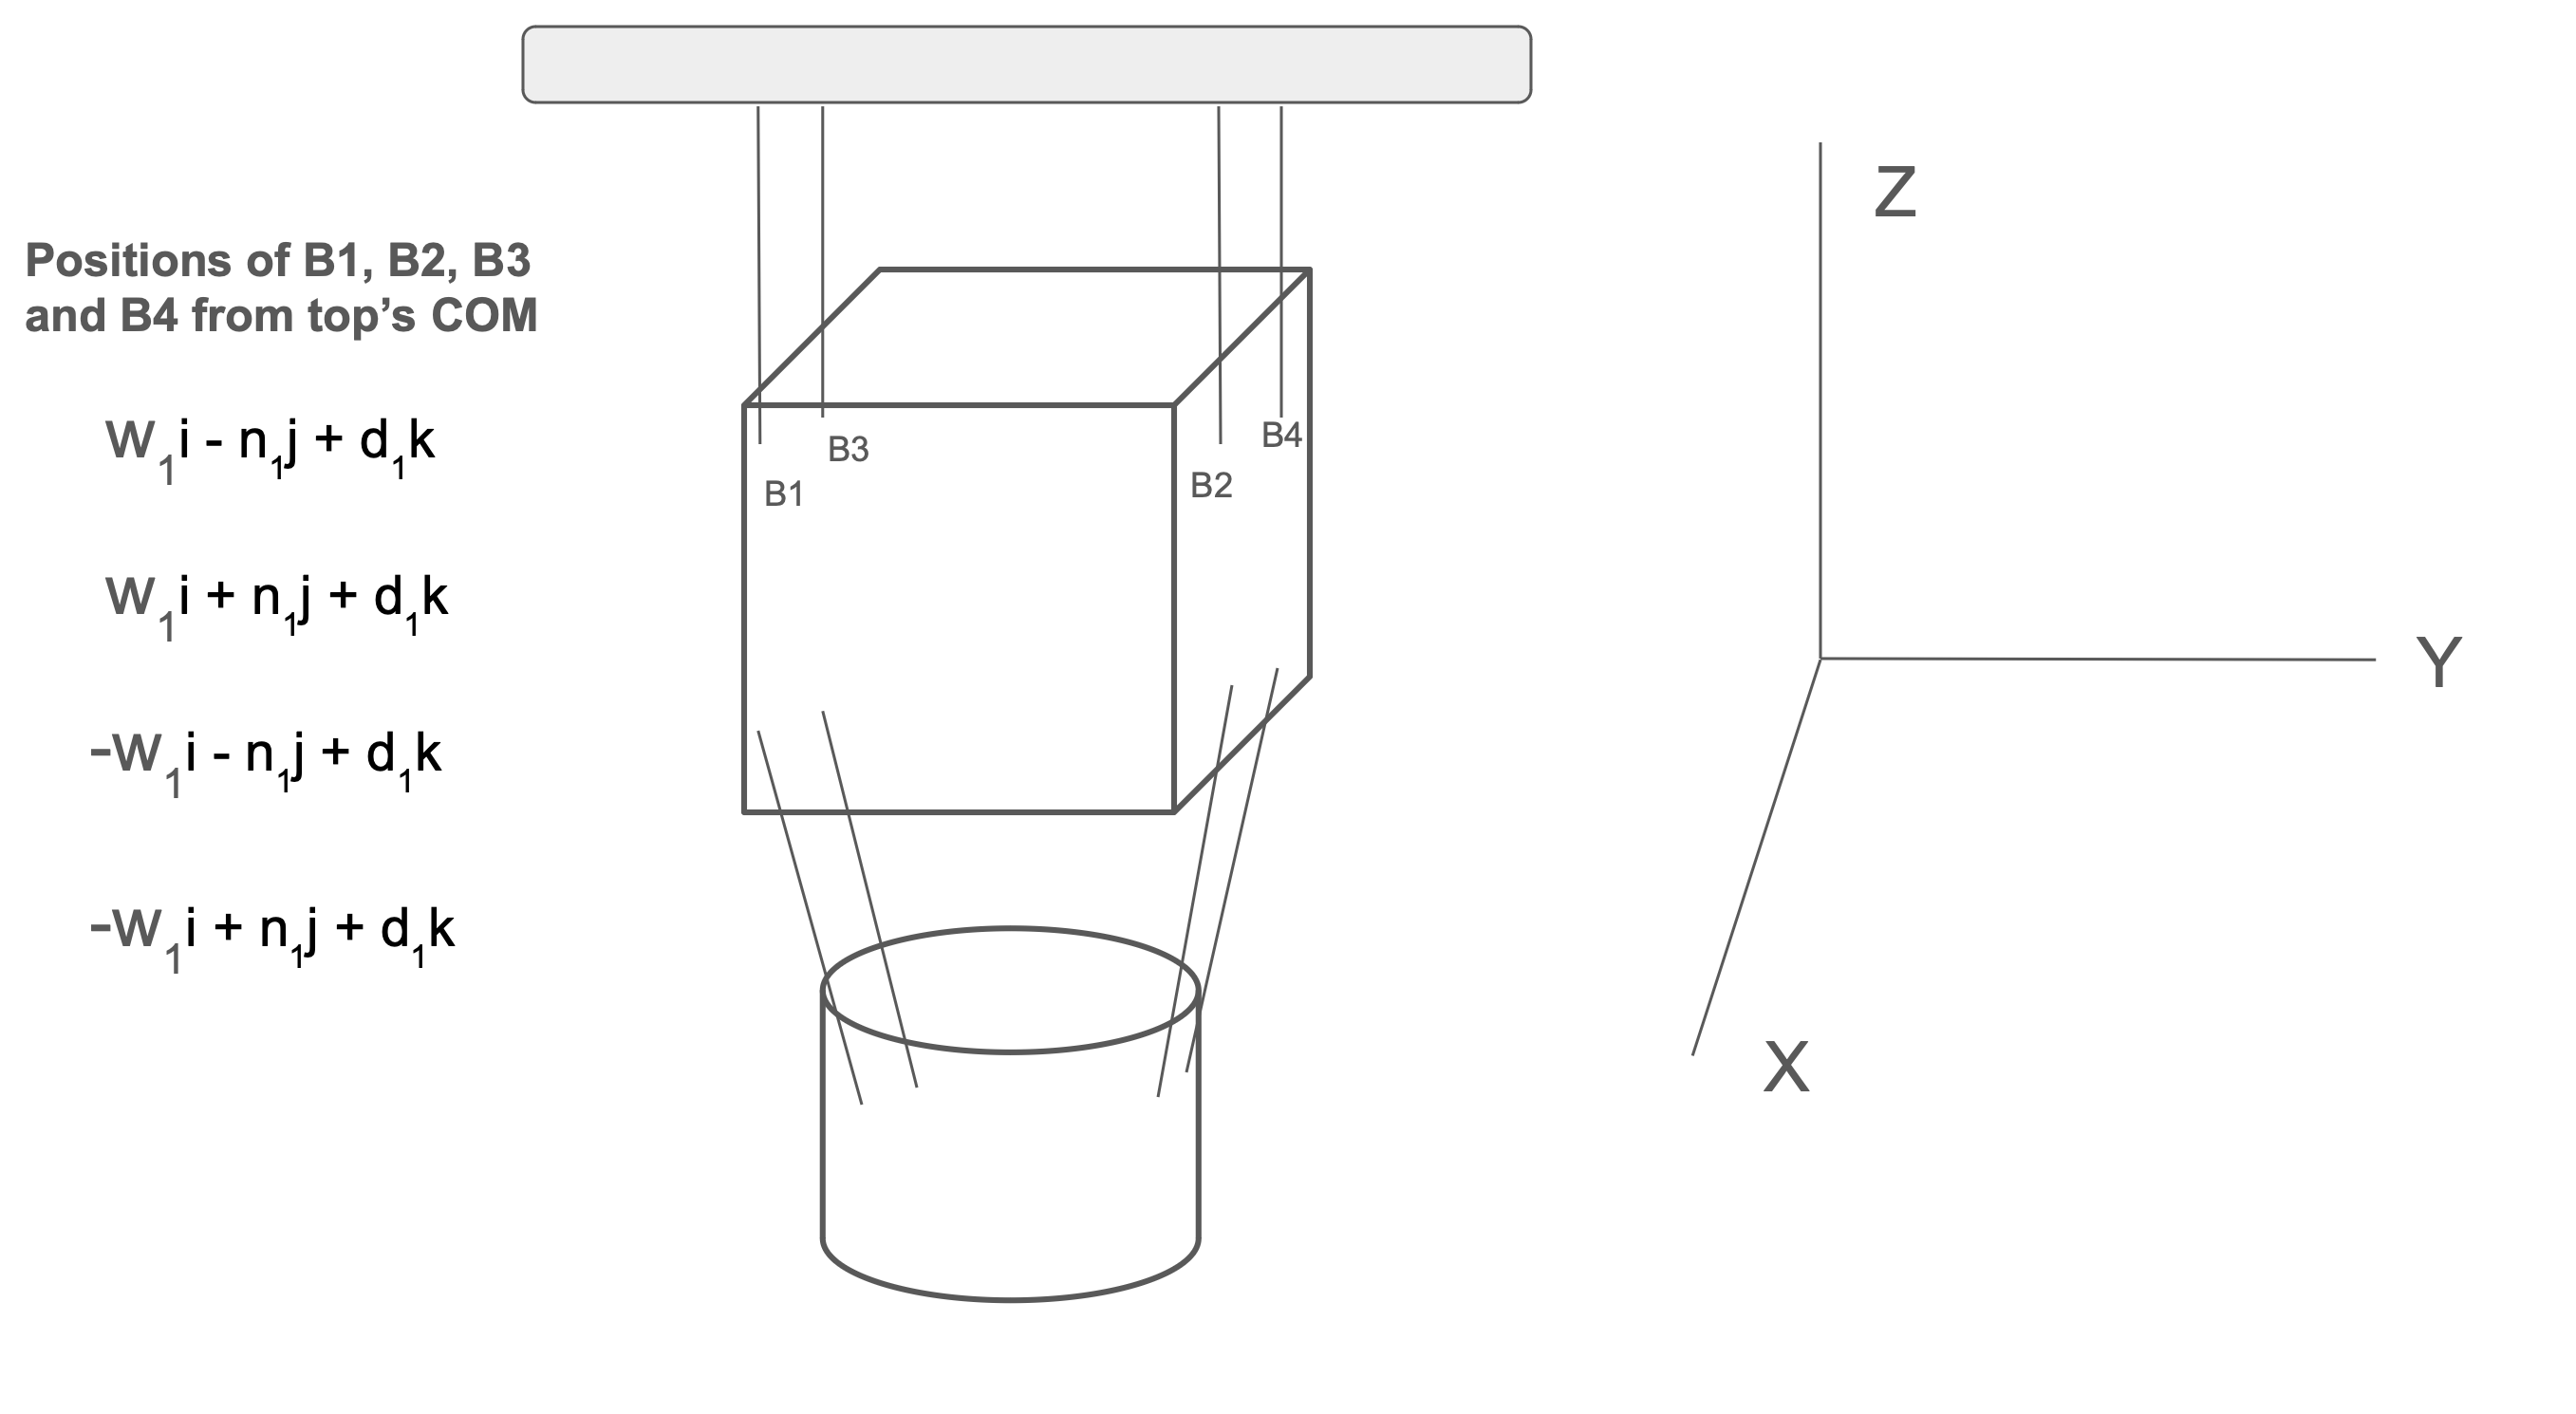

In [77]:
import cv2
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread("/content/two_block_system.jpg")
cv2_imshow(img)

In [2]:
!pip install control
import control
from sympy import Poly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.1/455.1 kB 3.6 MB/s eta 0:00:00


In [33]:
q1, q2, q3, q4, q5, q6, q7, u1, u2, u3, u4, u5, u6, u7, x_n1, x_n2, x_01, x_02 = dynamicsymbols('q1 q2 q3 q4 q5 q6 q7 u1 u2 u3 u4 u5 u6 u7 x_n1 x_n2 x_01 x_02')
M1, M2, k1, k2, d, d1, d2, d3, n1, n2, g, w1, w2, ixx1, ixx2, iyy1, iyy2, izz1, izz2, c1, c2, t = symbols('M1 M2 k1 k2 d d1 d2 d3 n1 n2 g w1 w2 ixx1 ixx2 iyy1 iyy2 izz1 izz2 c1 c2 t')
T1, T2, T3, T4 = symbols('T1 T2 T3 T4')
gamma, alpha1, alpha2, beta1, beta2, omega1, omega2 = dynamicsymbols('gamma, alpha1, alpha2, beta1, beta2, omega1, omega2')

In [34]:
N = ReferenceFrame('N') # this is the global frame
N_a = ReferenceFrame('N_a') # this is the  frame of suspension point
A = ReferenceFrame('A') # this is the frame of the body
B = ReferenceFrame('B') # this is the frame of the body

A.orient_axis(N, 0, N.z) # Initially A and N are parallel
B.orient_axis(N, 0, N.z) # Initially B and N are parallel
N_a.orient_axis(N, 0, N.z) # Initially N and N_a are parallel

In [35]:
O = Point('O')
P = Point('P')
P1 = Point('P1')
P2 = Point('P2')
P3 = Point('P3')
P4 = Point('P4')
X1 = Point('X1')
B1 = Point('B1')
B2 = Point('B2')
B3 = Point('B3')
B4 = Point('B4')
X2 = Point('X2')
C1 = Point('C1')
C2 = Point('C2')
C3 = Point('C3')
C4 = Point('C4')
D1 = Point('D1')
D2 = Point('D2')
D3 = Point('D3')
D4 = Point('D4')


X1a = Point('X1a')
X2a = Point('X2a')
P1a = Point('P1a')
P2a = Point('P2a')
B1a = Point('B1a')
B2a = Point('B2a')
B3a = Point('B3a')
B4a = Point('B4a')
C1a = Point('C1a')
C2a = Point('C2a')
C3a = Point('C3a')
C4a = Point('C4a')
D1a = Point('D1a')
D2a = Point('D2a')
D3a = Point('D3a')
D4a = Point('D4a')

In [6]:
def pos_vectors(point1, point2, frame):

    pos_vec = point1.pos_from(point2).express(frame)

    return pos_vec

In [7]:
def position_points(configuration=None):

  print("Running position points")



  P.set_pos(O, q1*N.x + q2*N.y )
  X1.set_pos(O,  q1*N.x + q2*N.y -q4*N.z)

  B1.set_pos(X1, w1*A.x +  d1*A.z - n1*A.y)
  B2.set_pos(X1, w1*A.x +  d1*A.z + n1*A.y)
  B3.set_pos(X1, -w1*A.x + d1*A.z - n1*A.y)
  B4.set_pos(X1, -w1*A.x + d1*A.z + n1*A.y)

  # P1, P2, P3 and P4 are points on the cieling
  P1.set_pos(P, w1*N_a.x - n1*N_a.y + d*N_a.z)
  P2.set_pos(P, w1*N_a.x + n1*N_a.y + d*N_a.z)
  P3.set_pos(P, -w1*N_a.x - n1*N_a.y + d*N_a.z)
  P4.set_pos(P, -w1*N_a.x + n1*N_a.y + d*N_a.z)

  C1.set_pos(X1, w2*A.x - d2*A.z - n1*A.y)
  C2.set_pos(X1, w2*A.x - d2*A.z + n1*A.y)
  C3.set_pos(X1, -w2*A.x - d2*A.z - n1*A.y)
  C4.set_pos(X1, -w2*A.x - d2*A.z + n1*A.y)
  ### We have defined all the points on Body 1 (Bs and Cs and $X_1$)
  ### and suspension points ($P_1$, $P_2$, $P_3$, $P_4$)


  ### COM of Second body
  if configuration=='pitch':
    X2.set_pos(O, q5*N.x + q2*N.y -q7*N.z)

  elif configuration=='roll':
    X2.set_pos(O, q1*N.x + q3*N.y -q7*N.z)

  elif configuration=='yaw':
    X2.set_pos(O, q1*N.x + q2*N.y -q7*N.z)

  else:
    pass

  D1.set_pos(X2, w2*B.x + d3*B.z - n2*B.y)
  D2.set_pos(X2, w2*B.x + d3*B.z + n2*B.y)
  D3.set_pos(X2, -w2*B.x + d3*B.z - n2*B.y)
  D4.set_pos(X2, -w2*B.x + d3*B.z + n2*B.y)
  print(pos_vectors(X1, X2, A))

  ### Now we have defined all the points on Body 2 as well


  global b1p1_a1, b2p2_a1, b1p1_b1, b2p2_b1, b1p1_n1, b2p2_n1
  global d1c1_a1, d2c2_a1, d1c1_b1, d2c2_b1, d1c1_n1, d2c2_n1

  b1p1_a1 = pos_vectors(B1, P1, A)
  b2p2_a1 = pos_vectors(B2, P2, A)
  b1p1_b1 = pos_vectors(B1, P1, B)
  b2p2_b1 = pos_vectors(B2, P2, B)
  b1p1_n1 = pos_vectors(B1, P1, N)
  b2p2_n1 = pos_vectors(B2, P2, N)


  d1c1_a1 = pos_vectors(D1, C1, A)
  d2c2_a1 = pos_vectors(D2, C2, A)
  d1c1_b1 = pos_vectors(D1, C1, B)
  d2c2_b1 = pos_vectors(D2, C2, B)
  d1c1_n1 = pos_vectors(D1, C1, N)
  d2c2_n1 = pos_vectors(D2, C2, N)

  return

In [8]:
def move_points(configuration=None):
  print("Running move points")

  if configuration=='pitch':
    print("Running for Pitch and Longitudnal")

    X1a.set_pos(O, (q1 + x_n1)*N.x  + q2*N.y - q4*N.z)
    X2a.set_pos(O, (q5 + x_n2)*N.x + (q2)*N.y - q7*N.z )

  elif configuration=='roll':
    print("Running for Roll and Transverse")

    X1a.set_pos(O, q1*N.x + (q2 + x_n1)*N.y - q4*N.z )
    X2a.set_pos(O, (q1)*N.x + (q3 + x_n2)*N.y  - q7*N.z)

  elif configuration=='yaw':
    print("Running for Yaw and Vertical")

    X1a.set_pos(O,  q1*N.x + q2*N.y - (q4 + x_n1)*N.z)
    X2a.set_pos(O, q1*N.x  + q2*N.y  - (q7 + x_n2)*N.z)



  B1a.set_pos(X1a, w1*A.x +  d1*A.z - n1*A.y)
  B2a.set_pos(X1a, w1*A.x +  d1*A.z + n1*A.y)
  B3a.set_pos(X1a, -w1*A.x + d1*A.z - n1*A.y)
  B4a.set_pos(X1a, -w1*A.x + d1*A.z + n1*A.y)

  C1a.set_pos(X1a, w2*A.x - d2*A.z - n1*A.y)
  C2a.set_pos(X1a, w2*A.x - d2*A.z + n1*A.y)
  C3a.set_pos(X1a, -w2*A.x - d2*A.z - n1*A.y)
  C4a.set_pos(X1a, -w2*A.x - d2*A.z + n1*A.y)

  D1a.set_pos(X2a, w2*B.x + d3*B.z - n2*B.y)
  D2a.set_pos(X2a, w2*B.x + d3*B.z + n2*B.y)
  D3a.set_pos(X2a, -w2*B.x + d3*B.z - n2*B.y)
  D4a.set_pos(X2a, -w2*B.x + d3*B.z + n2*B.y)





  global b1ap1_a2, b2ap2_a2, b1ap1_b2, b2ap2_b2, b1ap1_n2, b2ap2_n2
  global d1ac1a_a2, d2ac2a_a2, d1ac1a_b2, d2ac2a_b2, d1ac1a_n2, d2ac2a_n2

  b1ap1_a2 = pos_vectors(B1a, P1, A)
  b2ap2_a2 = pos_vectors(B2a, P2, A)
  b1ap1_b2 = pos_vectors(B1a, P1, B)
  b2ap2_b2 = pos_vectors(B2a, P2, B)
  b1ap1_n2 = pos_vectors(B1a, P1, N)
  b2ap2_n2 = pos_vectors(B2a, P2, N)

  d1ac1a_a2 = pos_vectors(D1a, C1a, A)
  d2ac2a_a2 = pos_vectors(D2a, C2a, A)
  d1ac1a_b2 = pos_vectors(D1a, C1a, B)
  d2ac2a_b2 = pos_vectors(D2a, C2a, B)
  d1ac1a_n2 = pos_vectors(D1a, C1a, N)
  d2ac2a_n2 = pos_vectors(D2a, C2a, N)

  return

In [9]:
def rotate_blocks(configuration=None):

  print("Running rotate blocks")

  global b1ap1_a_rot, b2ap2_a_rot, b3ap3_a_rot, b4ap4_a_rot
  global b1ap1_b_rot, b2ap2_b_rot, b3ap3_b_rot, b4ap4_b_rot
  global b1ap1_n_rot, b2ap2_n_rot, b3ap3_n_rot, b4ap4_n_rot

  global d1ac1a_a_rot, d2ac2a_a_rot, d3ac3a_a_rot, d4ac4a_a_rot
  global d1ac1a_b_rot, d2ac2a_b_rot, d3ac3a_b_rot, d4ac4a_b_rot
  global d1ac1a_n_rot, d2ac2a_n_rot, d3ac3a_n_rot, d4ac4a_n_rot


  if configuration=='pitch':
    A.orient_axis(N, -(alpha1 - beta1), N.y)
    B.orient_axis(N, -(alpha2 - beta2), N.y)
  elif configuration=='roll':
    A.orient_axis(N, -(alpha1 - beta1), N.x)
    B.orient_axis(N, -(alpha2 - beta2), N.x)
  elif configuration=='yaw':
    A.orient_axis(N, (alpha1-beta1), N.z)
    B.orient_axis(N, (alpha2-beta2), N.z)


  b1ap1_a_rot = pos_vectors(B1a, P1, A)
  b2ap2_a_rot = pos_vectors(B2a, P2, A)
  b3ap3_a_rot = pos_vectors(B3a, P3, A)
  b4ap4_a_rot = pos_vectors(B4a, P4, A)

  b1ap1_b_rot = pos_vectors(B1a, P1, B)
  b2ap2_b_rot = pos_vectors(B2a, P2, B)
  b3ap3_b_rot = pos_vectors(B3a, P3, B)
  b4ap4_b_rot = pos_vectors(B4a, P4, B)

  b1ap1_n_rot = pos_vectors(B1a, P1, N)
  b2ap2_n_rot = pos_vectors(B2a, P2, N)
  b3ap3_n_rot = pos_vectors(B3a, P3, N)
  b4ap4_n_rot = pos_vectors(B4a, P4, N)

  d1ac1a_a_rot = pos_vectors(D1a, C1a, A)
  d2ac2a_a_rot = pos_vectors(D2a, C2a, A)
  d3ac3a_a_rot = pos_vectors(D3a, C3a, A)
  d4ac4a_a_rot = pos_vectors(D4a, C4a, A)

  d1ac1a_b_rot = pos_vectors(D1a, C1a, B)
  d2ac2a_b_rot = pos_vectors(D2a, C2a, B)
  d3ac3a_b_rot = pos_vectors(D3a, C3a, B)
  d4ac4a_b_rot = pos_vectors(D4a, C4a, B)

  d1ac1a_n_rot = pos_vectors(D1a, C1a, N)
  d2ac2a_n_rot = pos_vectors(D2a, C2a, N)
  d3ac3a_n_rot = pos_vectors(D3a, C3a, N)
  d4ac4a_n_rot = pos_vectors(D4a, C4a, N)



  return

In [10]:
def tensions(configuration=None):

  print("Running tensions")

  global dirT1, dirT2, dirT3, dirT4, dirT5, dirT6, dirT7, dirT8
  global T1, T2, T3, T4, T5, T6, T7, T8

  global delta_l1, delta_l2, delta_l3, delta_l4, delta_l5, delta_l6, delta_l7, delta_l8



  delta_l1, delta_l2, delta_l3, delta_l4, delta_l5, delta_l6, delta_l7, delta_l8 = symbols('delta_l1 delta_l2 delta_l3 delta_l4 delta_l5 delta_l6 delta_l7 delta_l8')

  T1 = smp.Rational(1,2)*(M1 + M2)*g + k1*delta_l1 #k1*extb1p1_n_approx
  T2 = smp.Rational(1,2)*(M1 + M2)*g - k1*delta_l2 # k1*extb2p2_n_approx
  T3 = smp.Rational(1,2)*(M1 + M2)*g + k1*delta_l1 #k1*extb1p1_n_approx
  T4 = smp.Rational(1,2)*(M1 + M2)*g - k1*delta_l2 # k1*extb2p2_n_approx

  T5 = smp.Rational(1,2)*(M2*g) - k2*delta_l5 # k2*extd1c1_n_approx
  T6 = smp.Rational(1,2)*(M2*g) + k2*delta_l6 # k2*extd2c2_n_approx
  T7 = smp.Rational(1,2)*(M2*g) - k2*delta_l5 # k2*extd1c1_n_approx
  T8 = smp.Rational(1,2)*(M2*g) + k2*delta_l6 # k2*extd2c2_n_approx


  dirT1 = -b1ap1_n_rot/b1ap1_n_rot.magnitude()
  dirT2 = -b2ap2_n_rot/b2ap2_n_rot.magnitude()
  dirT3 = -b3ap3_n_rot/b3ap3_n_rot.magnitude()
  dirT4 = -b4ap4_n_rot/b4ap4_n_rot.magnitude()

  dirT5 = -d1ac1a_n_rot/d1ac1a_n_rot.magnitude()
  dirT6 = -d2ac2a_n_rot/d2ac2a_n_rot.magnitude()
  dirT7 = -d3ac3a_n_rot/d3ac3a_n_rot.magnitude()
  dirT8 = -d4ac4a_n_rot/d4ac4a_n_rot.magnitude()



  return

In [12]:
def create_blocks(configuration=None):

  print("Running create blocks")

  global block1, block2
  IB = inertia(A, ixx1, iyy1, izz1)
  block1 = Body('C1', X1a, mass=M1, frame=A, central_inertia=IB)

  IB2 = inertia(B, ixx2, iyy2, izz2)
  block2 = Body('C2', X2a, mass=M2, frame=B, central_inertia=IB2)

  if configuration=='pitch':
    block1.frame.set_ang_vel(N, omega1*N.y)
    X1a.set_vel(N, u1*N.x + u4*N.z)

    block2.frame.set_ang_vel(N, omega2*N.y)
    X2a.set_vel(N, u5*N.x + u7*N.z)

  elif configuration=='roll':
    block1.frame.set_ang_vel(N, omega1*N.x)
    X1a.set_vel(N, u2*N.y + u4*N.z)

    block2.frame.set_ang_vel(N, omega2*N.x)
    X2a.set_vel(N, u3*N.y + u7*N.z)

  elif configuration=='yaw':
    block1.frame.set_ang_vel(N, omega1*N.z)
    X1a.set_vel(N, u1*N.x + u2*N.y +  u4*N.z)

    block2.frame.set_ang_vel(N, omega2*N.z)
    X2a.set_vel(N, u1*N.x + u2*N.y+ u7*N.z)

  else:
    pass


  block1.apply_force(T1*dirT1, point=B1a)
  block1.apply_force(T2*dirT2, point=B2a)
  block1.apply_force(T3*dirT3, point=B3a)
  block1.apply_force(T4*dirT4, point=B4a)

  block1.apply_force(-T5*dirT5, point=C1a)
  block1.apply_force(-T6*dirT6, point=C2a)
  block1.apply_force(-T7*dirT7, point=C3a)
  block1.apply_force(-T8*dirT8, point=C4a)

  block2.apply_force(T5*dirT5, point=D1a)
  block2.apply_force(T6*dirT6, point=D2a)
  block2.apply_force(T7*dirT7, point=D3a)
  block2.apply_force(T8*dirT8, point=D4a)


  block1.apply_force(-(M1 + M2)*g*N.z.express(A), point=X1a)

  block2.apply_force(-(M2)*g*N.z.express(B), point=X2a)

  return

In [13]:
def solve_kane(configuration=None):

  print("Running solve kane")

  if configuration=='pitch':
    print("Running for pitch and longitudnal")

    kane = me.KanesMethod(N, q_ind=[alpha1, x_n1, q4, alpha2, x_n2, q7],
                      u_ind = [omega1, u1, u4, omega2, u5, u7],
                      kd_eqs=[u1-x_n1.diff(t), u4 + q4.diff(t), omega1 - alpha1.diff(t), u5 - x_n2.diff(t), u7 + q7.diff(t),  omega2 - alpha2.diff(t)])


  elif configuration=='roll':
    print("Running for roll and transverse")
    kane = me.KanesMethod(N, q_ind=[alpha1, x_n1, q4, alpha2, x_n2, q7],
                      u_ind = [omega1, u2, u4, omega2, u3, u7],
                      kd_eqs=[u2-x_n1.diff(t), u4 + q4.diff(t), omega1 - alpha1.diff(t), u3 - x_n2.diff(t), u7 + q7.diff(t),  omega2 - alpha2.diff(t)])


  elif configuration=='yaw':
    print("Running for yaw and vertical")
    kane = me.KanesMethod(N, q_ind=[alpha1, q1, q2, x_n1, alpha2, x_n2],
                      u_ind = [omega1, u1, u2, u4, omega2, u7],
                      kd_eqs=[u1-q1.diff(t), u2 - q2.diff(t), u4 + x_n1.diff(t), omega1 - alpha1.diff(t), u7 + x_n2.diff(t),  omega2 - alpha2.diff(t)])


  kaneeq = kane.kanes_equations([block1, block2], [block1.loads[0], block1.loads[1], block1.loads[2], block1.loads[3], block1.loads[4], block1.loads[5], block1.loads[6], block1.loads[7], block1.loads[8],
                                                   block2.loads[0], block2.loads[1], block2.loads[2],block2.loads[3], block2.loads[4]])

  return kane, kaneeq

In [14]:
def linearize_(kane=None,configuration=None):

  print("Running linearize")

  if configuration=='pitch':
    print("Linearzing for pitch and longitudinal motion")
    kanel = kane.to_linearizer()
    A_mat, B_mat = kanel.linearize(A_and_B=True, op_point={alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0, q1:q5})


  elif configuration=='roll':
    print("Linearzing for roll and transverse motion")
    kanel = kane.to_linearizer()
    A_mat, B_mat = kanel.linearize(A_and_B=True, op_point={alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0, q2:q3})


  elif configuration=='yaw':
     kanel = kane.to_linearizer()
     A_mat, B_mat = kanel.linearize(A_and_B=True, op_point={alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0})

  else:
    pass

  return A_mat, B_mat


In [15]:
def simplify_A_B(A_mat=None, B_mat=None):

  print("simplify A B")

  global l1, l2, n_diff

  l1, l2 = symbols('l1 l2', positive=True)
  n_diff = symbols('n_diff')

  A_mat = A_mat.subs({-d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2 , n1-n2:n_diff})
  A_mat.simplify()

  A_mat_ = A_mat.subs({delta_l1:delta_l3, delta_l2:delta_l4, delta_l5:delta_l7, delta_l6:delta_l8})
  A_mat_.simplify()

  A_mat_a = A_mat.subs({delta_l1:0, delta_l2:0, delta_l3:0, delta_l4:0, delta_l5:0, delta_l6:0, delta_l7:0, delta_l8:0})
  A_mat_a.simplify()

  B_mat = B_mat.subs({-d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2 , n1-n2:n_diff})
  B_mat.simplify()

  B_mat_ = B_mat.subs({delta_l1:delta_l3, delta_l2:delta_l4, delta_l5:delta_l7, delta_l6:delta_l8})
  B_mat_.simplify()

  B_mat_a = B_mat.subs({delta_l1:0, delta_l2:0, delta_l3:0, delta_l4:0, delta_l5:0, delta_l6:0, delta_l7:0, delta_l8:0})
  B_mat_a.simplify()

  return A_mat, A_mat_, A_mat_a, B_mat, B_mat_, B_mat_a

In [16]:
def check_A_mat(component_kane=0,input_component=x_n1, component_a_mat=6, input_ind=0, configuration=None):

  if configuration=='pitch':
    print("Checking A matrix for pitch and longitudinal motion")

    kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0, q1:q5}).subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,
                                                                                         -d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2 , n1-n2:n_diff}).simplify()
    A_mat_val = A_mat[component_a_mat, input_ind].subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,
                                                                                         -d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2, q1:q5, n1-n2:n_diff}).simplify()


  elif configuration=='roll':
    print("Checking A matrix for roll and transverse motion")

    kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0, q2:q3}).subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,
                                                                                         -d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2 , n1-n2:n_diff}).simplify()
    A_mat_val = A_mat[component_a_mat, input_ind].subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,-d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2,  q2:q3, n1-n2:n_diff}).simplify()

  elif configuration=='yaw':
    print("Checking A matrix for yaw and vertical motion")
    kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0}).subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,
                                                                                         -d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2 , n1-n2:n_diff}).simplify()
    A_mat_val = A_mat[component_a_mat, input_ind].subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,-d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2,  n1-n2:n_diff}).simplify()


  else:
    pass




  if configuration:
    force_dict = {0:'horizontal F Mass 1', 1:'Vertical Force Mass 1',
                  2:'Torque Mass 1', 3:'Horizontal Force Mass 2',
                  4:'Vertical Force Mass 2', 5:'Torque Mass 2'}


    mass_torque_dict = {0:iyy1, 1:M1, 2:M1, 3:iyy2, 4:M2, 5:M2}



    diff = (kanes_val/mass_torque_dict[component_kane] - A_mat_val).simplify()

  else:
    force_dict, mass_torque_dict, diff= -1, -1, -1





  return diff, kanes_val, A_mat_val

In [17]:
def check_B_mat(component_kane=0,input_component=beta1, component_b_mat=6, input_ind=0, configuration=None):

  if configuration=='pitch':
    print("Checking B matrix for pitch and longitudinal motion")

    kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0, q1:q5}).subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,
                                                                                         -d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2 , n1-n2:n_diff}).simplify()
    B_mat_val = B_mat[component_b_mat, input_ind].subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,
                                                                                         -d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2, q1:q5, n1-n2:n_diff}).simplify()


  elif configuration=='roll':
    print("Checking B matrix for roll and transverse motion")

    kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0, q2:q3}).subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,
                                                                                         -d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2 , n1-n2:n_diff}).simplify()
    B_mat_val = B_mat[component_b_mat, input_ind].subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,-d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2,  q2:q3, n1-n2:n_diff}).simplify()


  elif configuration=='yaw':
    print("Checking B matrix for yaw and vertical motion")

    kanes_val = kaneeq[0][component_kane].diff(input_component).subs({alpha1:beta1, alpha2:beta2, x_n1:0, x_n2:0}).subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,
                                                                                         -d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2 , n1-n2:n_diff}).simplify()
    B_mat_val = B_mat[component_b_mat, input_ind].subs({delta_l5:0, delta_l6:0, delta_l1:0, delta_l2:0,-d + d1 - q4:-l1, d2 + d3 + q4 - q7: -l2, n1-n2:n_diff}).simplify()


  else:
    pass




  if configuration:
    force_dict = {0:'horizontal F Mass 1', 1:'Vertical Force Mass 1',
                  2:'Torque Mass 1', 3:'Horizontal Force Mass 2',
                  4:'Vertical Force Mass 2', 5:'Torque Mass 2'}

    mass_torque_dict = {0:iyy1, 1:M1, 2:M1, 3:iyy2, 4:M2, 5:M2}

    diff = (kanes_val/mass_torque_dict[component_kane] - B_mat_val).simplify()

  else:
    force_dict, mass_torque_dict, diff= -1, -1, -1





  return diff, kanes_val, B_mat_val

In [44]:
def get_tf_matrix(A=None, B=None):

  s = symbols('s')
  si = s*eye(A.shape[0])


  sia = si - A
  sia.simplify()
  sia_a_eval = sia.evalf(subs={M1:2.88, M2:2.662, d1:0.02275, d:0.011, d2:0.015, d3:0.001, l1:0.311, l2:0.3, n1:0.194/2, n2:0.155/2,
                                 n_diff:0.0195,  w1:0.06, w2:0.02,  q4:l1 -d + d1, q7:l1 -d + d1 + d2 + l2 + d3,
                            g:9.8, ixx1:0.008376, ixx2:0.007486875, iyy1:0.00981984, iyy2:0.00499125, izz1:0.01699584, izz2:0.00499125})

  print("Getting the determinant")
  sia_det_a_eval = sia_a_eval.det()
  sia_adj_a_eval = sia_a_eval.adjugate()

  sia_det_a_eval_inv = sia_adj_a_eval/sia_det_a_eval

  sia_inv_B_a_eval = sia_det_a_eval_inv*B


  return sia_inv_B_a_eval

In [19]:
def get_tfs(sia_B_matrix=None, configuration=None):

  print("Running get_tfs")

  if configuration=='pitch':
    print("Running for pitch and longitudinal motion")


    tf_pt_pt = sia_B_matrix[0,0] # pitch top to pitch top
    tf_pb_pt = sia_B_matrix[0,1] # pitch bottom to pitch top
    tf_lt_pt = sia_B_matrix[0,2] # longitudinal top to pitch top
    tf_lb_pt = sia_B_matrix[0,3] # longitudinal bottom to pitch top

    tf_pt_lt = sia_B_matrix[1,0] # pitch top to longitudinal top
    tf_pb_lt = sia_B_matrix[1,1] # pitch bottom to longitudinal top
    tf_lt_lt = sia_B_matrix[1,2] # longitudinal top to longitudinal top
    tf_lb_lt = sia_B_matrix[1,3] # trasverse bottom to longitudinal top

    tf_pt_pb = sia_B_matrix[3,0] # pitch top to pitch bottom
    tf_pb_pb = sia_B_matrix[3,1] # pitch bottom to pitch bottom
    tf_lt_pb = sia_B_matrix[3,2] # longitudinal top to pitch bottom
    tf_lb_pb = sia_B_matrix[3,3] # trasverse bottom to pitch bottom

    tf_pt_lb = sia_B_matrix[4,0] # pitch top to longitudinal bottom
    tf_pb_lb = sia_B_matrix[4,1] # pitch bottom to longitudinal bottom
    tf_lt_lb = sia_B_matrix[4,2] # longitudinal top to longitudinal bottom
    tf_lb_lb = sia_B_matrix[4,3] # trasverse bottom to longitudinal bottom


    tf_dict = {'pt_lt':tf_pt_lt, 'pb_lt':tf_pb_lt, 'lt_lt': tf_lt_lt, 'lb_lt': tf_lb_lt,
               'pt_pt':tf_pt_pt, 'pb_pt': tf_pb_pt, 'lt_pt': tf_lt_pt, 'lb_pt': tf_lb_pt,
               'pt_lb': tf_pt_lb, 'pb_lb': tf_pb_lb, 'lt_lb': tf_lt_lb, 'lb_lb': tf_lb_lb,
               'pt_pb': tf_pt_pb, 'pb_pb': tf_pb_pb, 'lt_pb': tf_lt_pb, 'lb_pb': tf_lb_pb}


  elif configuration=='roll':
    print("Running for roll and transverse motion")
    tf_rt_rt = sia_B_matrix[0,0] # roll top to roll top
    tf_rb_rt = sia_B_matrix[0,1] # roll bottom to roll top
    tf_tt_rt = sia_B_matrix[0,2] # transverse top to roll top
    tf_tb_rt = sia_B_matrix[0,3] # trasverse bottom to roll top

    tf_rt_tt = sia_B_matrix[1,0] # roll top to transverse top
    tf_rb_tt = sia_B_matrix[1,1] # roll bottom to transverse top
    tf_tt_tt = sia_B_matrix[1,2] # transverse top to transverse top
    tf_tb_tt = sia_B_matrix[1,3] # trasverse bottom to transverse top

    tf_rt_rb = sia_B_matrix[3,0] # roll top to roll bottom
    tf_rb_rb = sia_B_matrix[3,1] # roll bottom to roll bottom
    tf_tt_rb = sia_B_matrix[3,2] # transverse top to roll bottom
    tf_tb_rb = sia_B_matrix[3,3] # trasverse bottom to roll bottom

    tf_rt_tb = sia_B_matrix[4,0] # roll top to transverse bottom
    tf_rb_tb = sia_B_matrix[4,1] # roll bottom to transverse bottom
    tf_tt_tb = sia_B_matrix[4,2] # transverse top to transverse bottom
    tf_tb_tb = sia_B_matrix[4,3] # trasverse bottom to transverse bottom

    tf_dict = {'rt_rt': tf_rt_rt, 'rt_rb': tf_rt_rb, 'rt_tt': tf_rt_tt,
               'rt_tb':tf_rt_tb,
               'rb_rt': tf_rb_rt, 'rb_rb': tf_rb_rb, 'rb_tt': tf_rb_tt,
               'rb_tb':tf_rb_tb,
                'tb_rt': tf_tb_rt, 'tb_rb': tf_tb_rb, 'tb_tt': tf_tb_tt,
               'tb_tb':tf_tb_tb,
               'tt_rt': tf_tt_rt, 'tt_rb': tf_tt_rb, 'tt_tt': tf_tt_tt,
               'tt_tb':tf_tt_tb}

  elif configuration=='yaw':

    tf_yt_yt = sia_B_matrix[0,0] # Yaw top to Yaw top
    tf_yb_yt = sia_B_matrix[0,1] # Yaw bottom to Yaw top
    tf_vt_yt = sia_B_matrix[0,2] # vertical top to yaw top
    tf_vb_yt = sia_B_matrix[0,3] # vertical bottom to yaw top

    tf_yt_vt = sia_B_matrix[3,0] # yaw top to vertical top
    tf_yb_vt = sia_B_matrix[3,1] # yaw bottom to vertical top
    tf_vt_vt = sia_B_matrix[3,2] # vertical top to vertical top
    tf_vb_vt = sia_B_matrix[3,3] # vertical bottom to vertical top

    tf_yt_yb = sia_B_matrix[4,0] # yaw top to yaw bottom
    tf_yb_yb = sia_B_matrix[4,1] # yaw bottom to yaw bottom
    tf_vt_yb = sia_B_matrix[4,2] # vertical top to yaw bottom
    tf_vb_yb = sia_B_matrix[4,3] # vertical bottom to yaw bottom

    tf_yt_vb = sia_B_matrix[5,0] # yaw top to vertical bottom
    tf_yb_vb = sia_B_matrix[5,1] # yaw bottom to vertical bottom
    tf_vt_vb = sia_B_matrix[5,2] # vertical top to vertical bottom
    tf_vb_vb = sia_B_matrix[5,3] # vertical bottom to vertical bottom


    tf_dict = {'yt_yt': tf_yt_yt, 'yt_yb': tf_yt_yb, 'yt_vt': tf_yt_vt,
               'yt_vb':tf_yt_vb,
               'yb_yt': tf_yb_yt, 'yb_yb': tf_yb_yb, 'yb_vt': tf_yb_vt,
               'yb_vb':tf_yb_vb,
               'vb_yt': tf_vb_yt, 'vb_yb': tf_vb_yb, 'vb_vt': tf_vb_vt,
               'vb_vb':tf_vb_vb,
               'vt_yt': tf_vt_yt, 'vt_yb': tf_vt_yb, 'vt_vt': tf_vt_vt,
               'vt_vb':tf_vt_vb}


  else:
      pass

  return tf_dict

In [53]:
def plot_tfs(motion='pt_lb', tf_dict=None, damping=False, configuration=None, flow=0.1, fhigh=100, points=500):

  tf_key = motion

  tf_ = tf_dict[tf_key]
  #print(tf_)

  motion_dict = {'pt':'pitch top', 'pb':'pitch bottom', 'lt':'length top',
                 'lb':'length bottom', 'rt':'roll top', 'rb':'roll bottom',
                 'tt':'transverse top', 'tb':'transverse bottom',
                 'yt':'yaw top', 'yb':'yaw bottom', 'vt':'vertical top',
                 'vb':'vertical bottom'}


  tf_val = tf_.evalf(subs={M1:2.88, M2:2.662, d1:0.02275, d:0.011, d2:0.015, d3:0.001, l1:0.311, l2:0.3, n1:0.194/2, n2:0.155/2, n_diff:0.0195, w1:0.06, w2:0.02, q4:l1 -d + d1, q7:l1 -d + d1 + d2 + l2 + d3,
                            g:9.8, ixx1:0.008376, ixx2:0.007486875, iyy1:0.00981984, iyy2:0.00499125, izz1:0.01699584, izz2:0.00499125}).simplify()

  #tf_val = tf_val.evalf(subs={d2:0.015, d3:0.001, izz1:0.00981984, izz2:0.00499125})

  print("Generating transfer function for {}  to  {}".format(motion_dict[motion.split('_')[0]], motion_dict[motion.split('_')[1]]))



  try:
    num_coeffs, den_coeffs = Poly(tf_val.as_numer_denom()[0]).all_coeffs(), Poly(tf_val.as_numer_denom()[-1]).all_coeffs()
  except:
    num_coeffs, den_coeffs = tf_val.as_numer_denom()[0], Poly(tf_val.as_numer_denom()[-1]).all_coeffs()

  if damping:
    den_coeffs[-2] = 1e-5
  #print(den_coeffs)


  s = symbols('s')
  tf_val_ = Poly(num_coeffs, s)/Poly(den_coeffs, s)


  freq = np.geomspace(flow, fhigh, points)
  H = control.tf(np.array(num_coeffs, dtype=float), np.array(den_coeffs, dtype=float))
  #mag, phase, omega = control.bode(H, omega=freq, dB=False, deg=True, Hz=True, wrap_phase)
  control.bode_plot(H, omega=freq, dB=False, deg=True, Hz=True, label=motion, wrap_phase=True)
  plt.legend(loc='best')

  return tf_val_.simplify()

In [21]:
def generate_tfs(configuration=None):



  if configuration=='pitch':
    position_points(configuration='pitch')
    move_points(configuration='pitch')
  elif configuration=='roll':
    position_points(configuration='roll')
    move_points(configuration='roll')
  elif configuration=='yaw':
    position_points(configuration='yaw')
    move_points(configuration='yaw')
  else:
    pass

  if configuration=='pitch':
    rotate_blocks(configuration='pitch')
  elif configuration=='roll':
    rotate_blocks(configuration='roll')
  elif configuration=='yaw':
    rotate_blocks(configuration='yaw')
  else:
    pass


  tensions()
  create_blocks(configuration)

  if configuration=='pitch':
    kane, kaneeq = solve_kane(configuration='pitch')
    print(kaneeq[1])
    A_mat, B_mat = linearize_(kane=kane, configuration='pitch')
  elif configuration=='roll':
    kane, kaneeq = solve_kane(configuration='roll')
    A_mat, B_mat = linearize_(kane=kane, configuration='roll')
  elif configuration=='yaw':
    kane, kaneeq = solve_kane(configuration='yaw')
    A_mat, B_mat = linearize_(kane=kane, configuration='yaw')
  else:
    pass

  A_mat, A_mat_, A_mat_a, B_mat, B_mat_, B_mat_a = simplify_A_B(A_mat=A_mat, B_mat=B_mat)

  sia_inv_B_a = get_tf_matrix(A=A_mat_a, B=B_mat_a)


  if configuration=='pitch':
    tfs_sia_B = get_tfs(sia_B_matrix=sia_inv_B_a, configuration='pitch')

  elif configuration=='roll':
    tfs_sia_B = get_tfs(sia_B_matrix=sia_inv_B_a, configuration='roll')

  elif configuration=='yaw':
    tfs_sia_B = get_tfs(sia_B_matrix=sia_inv_B_a, configuration='yaw')
  else:
    pass

  return tfs_sia_B, sia_inv_B_a


In [22]:
tfs_pitch = generate_tfs(configuration='pitch')[0]

Running position points
(q1(t) - q5(t))*N.x + (-q4(t) + q7(t))*N.z
(q1(t) - q5(t))*A.x + (-q4(t) + q7(t))*A.z
Running move points
Running for Pitch and Longitudnal
Running rotate blocks
Running tensions
Running create blocks
Running solve kane
Running for pitch and longitudnal
Matrix([[-iyy1*Derivative(omega1(t), t)], [-M1*Derivative(u1(t), t)], [-M1*Derivative(u4(t), t)], [-iyy2*Derivative(omega2(t), t)], [-M2*Derivative(u5(t), t)], [-M2*Derivative(u7(t), t)]])
Running linearize
Linearzing for pitch and longitudinal motion
simplify A B
Getting the determinant
Running get_tfs
Running for pitch and longitudinal motion


Generating transfer function for pitch top  to  pitch top


                         128                          126                     
- 6.37721628362679e-129⋅s    + 9.98104839479687e-125⋅s    - 1.05321798495811e-
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

     125                          124                          123            
144⋅s    - 7.60606032903027e-121⋅s    + 1.67531596361347e-140⋅s    + 3.7590383
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

              122                          121                          120   
3302323e-117⋅s    - 1.29886302057774e-136⋅s    - 1.35390838312314e-113⋅s    + 
──────────────────────────────────────────────────

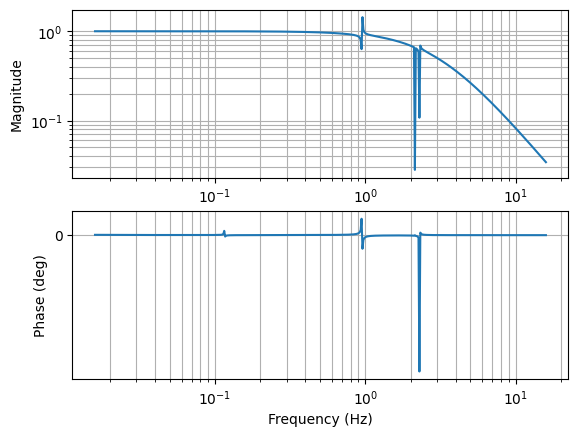

In [23]:
plot_tfs(motion='pt_pt', tf_dict=tfs_pitch)

Generating transfer function for pitch top  to  pitch bottom


                         128                         126                      
- 8.35122753806148e-132⋅s    + 1.3003802692506e-127⋅s    - 9.85387105100402e-1
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

    124                          122                          121             
24⋅s    + 4.83971250242223e-120⋅s    - 9.44811018646281e-141⋅s    - 1.73112160
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

             120                          119                          118    
874759e-116⋅s    + 1.50076167372011e-136⋅s    + 4.80353207878662e-113⋅s    - 1
──────────────────────────────────────────────────

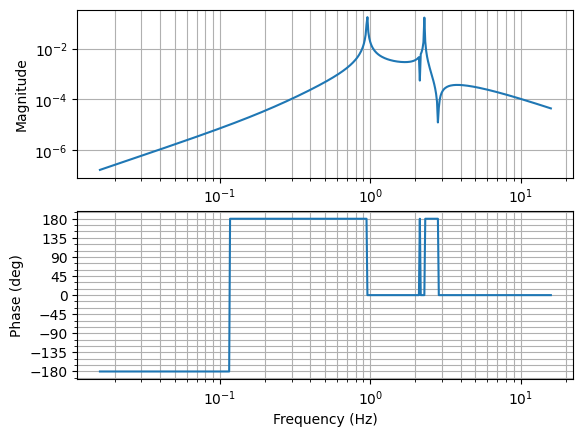

In [24]:
plot_tfs(motion='pt_pb', tf_dict=tfs_pitch)

In [109]:
tfs_pitch.keys()

dict_keys(['pt_lt', 'pb_lt', 'lt_lt', 'lb_lt', 'pt_pt', 'pb_pt', 'lt_pt', 'lb_pt', 'pt_lb', 'pb_lb', 'lt_lb', 'lb_lb', 'pt_pb', 'pb_pb', 'lt_pb', 'lb_pb'])

Generating transfer function for pitch top  to  length top
Generating transfer function for pitch bottom  to  length top
Generating transfer function for length top  to  length top
Generating transfer function for length bottom  to  length top
Generating transfer function for pitch top  to  pitch top
Generating transfer function for pitch bottom  to  pitch top
Generating transfer function for length top  to  pitch top
Generating transfer function for length bottom  to  pitch top
Generating transfer function for pitch top  to  length bottom
Generating transfer function for pitch bottom  to  length bottom
Generating transfer function for length top  to  length bottom
Generating transfer function for length bottom  to  length bottom
Generating transfer function for pitch top  to  pitch bottom
Generating transfer function for pitch bottom  to  pitch bottom
Generating transfer function for length top  to  pitch bottom
Generating transfer function for length bottom  to  pitch bottom


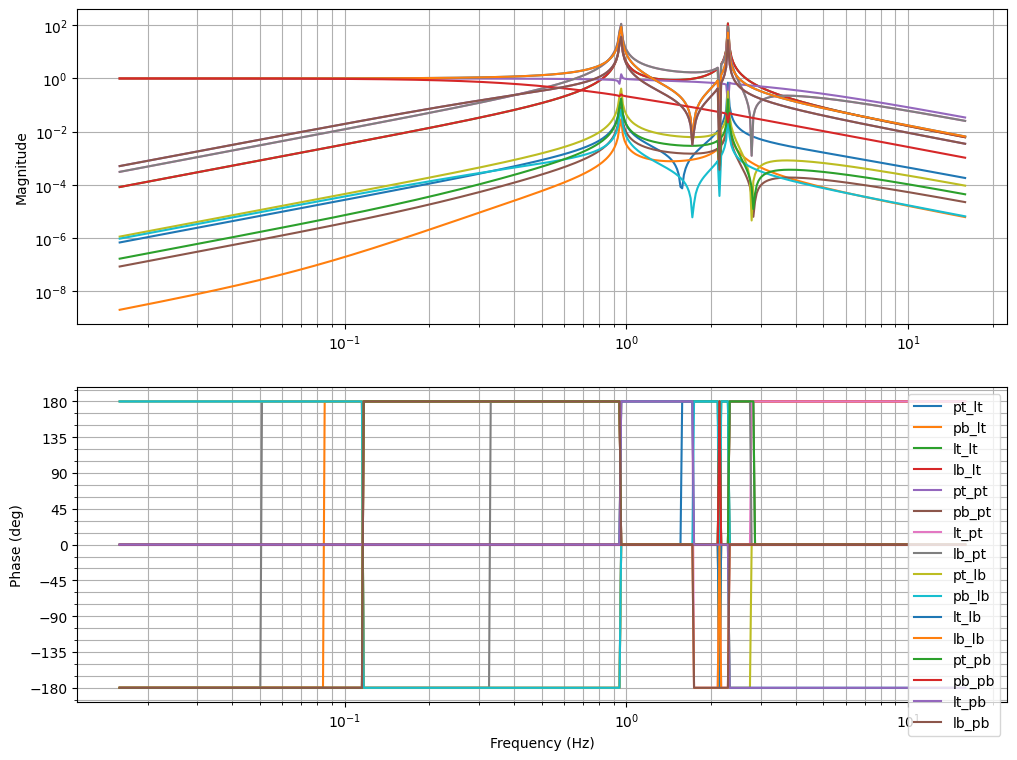

In [54]:
plt.figure(figsize=(12,9))
for i in tfs_pitch.keys():
  plot_tfs(motion=i, tf_dict=tfs_pitch)

In [29]:
tfs_roll = generate_tfs(configuration='roll')[0]

Running position points
(q2(t) - q3(t))*A.y + (-q4(t) + q7(t))*A.z
Running move points
Running for Roll and Transverse
Running rotate blocks
Running tensions
Running create blocks
Running solve kane
Running for roll and transverse
Running linearize
Linearzing for roll and transverse motion
simplify A B
Getting the determinant
Running get_tfs
Running for roll and transverse motion


Generating transfer function for roll top  to  roll top


                         128                         126                      
- 6.77906816318233e-130⋅s    + 1.1275030794848e-125⋅s    + 8.42160077713906e-1
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

    125                          124                          123             
46⋅s    - 9.13671019753378e-122⋅s    - 1.42330033057739e-141⋅s    + 4.80524110
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

             122                         121                          120     
512708e-118⋅s    + 1.1731225621017e-137⋅s    - 1.84330101579977e-114⋅s    - 6.
──────────────────────────────────────────────────

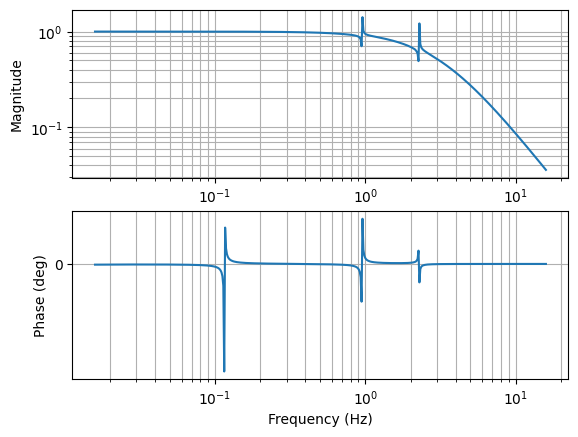

In [30]:
plot_tfs(motion='rt_rt', tf_dict=tfs_roll)

Generating transfer function for roll top  to  roll bottom


                         128                          126                     
- 2.20694691418053e-132⋅s    + 3.61763302873607e-128⋅s    - 1.61759438696549e-
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

     125                          124                          123            
147⋅s    - 2.88536434287087e-124⋅s    + 2.70706626175859e-143⋅s    + 1.4912774
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

              122                          121                          120   
5589963e-120⋅s    - 2.22521745985419e-139⋅s    - 5.61162559195311e-117⋅s    + 
──────────────────────────────────────────────────

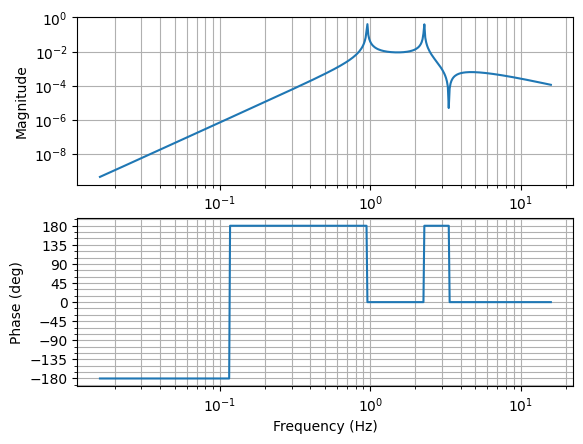

In [31]:
plot_tfs(motion='rt_rb', tf_dict=tfs_roll)

Generating transfer function for roll top  to  roll top
Generating transfer function for roll top  to  roll bottom
Generating transfer function for roll top  to  transverse top
Generating transfer function for roll top  to  transverse bottom
Generating transfer function for roll bottom  to  roll top
Generating transfer function for roll bottom  to  roll bottom
Generating transfer function for roll bottom  to  transverse top
Generating transfer function for roll bottom  to  transverse bottom
Generating transfer function for transverse bottom  to  roll top
Generating transfer function for transverse bottom  to  roll bottom
Generating transfer function for transverse bottom  to  transverse top
Generating transfer function for transverse bottom  to  transverse bottom
Generating transfer function for transverse top  to  roll top
Generating transfer function for transverse top  to  roll bottom
Generating transfer function for transverse top  to  transverse top
Generating transfer function fo

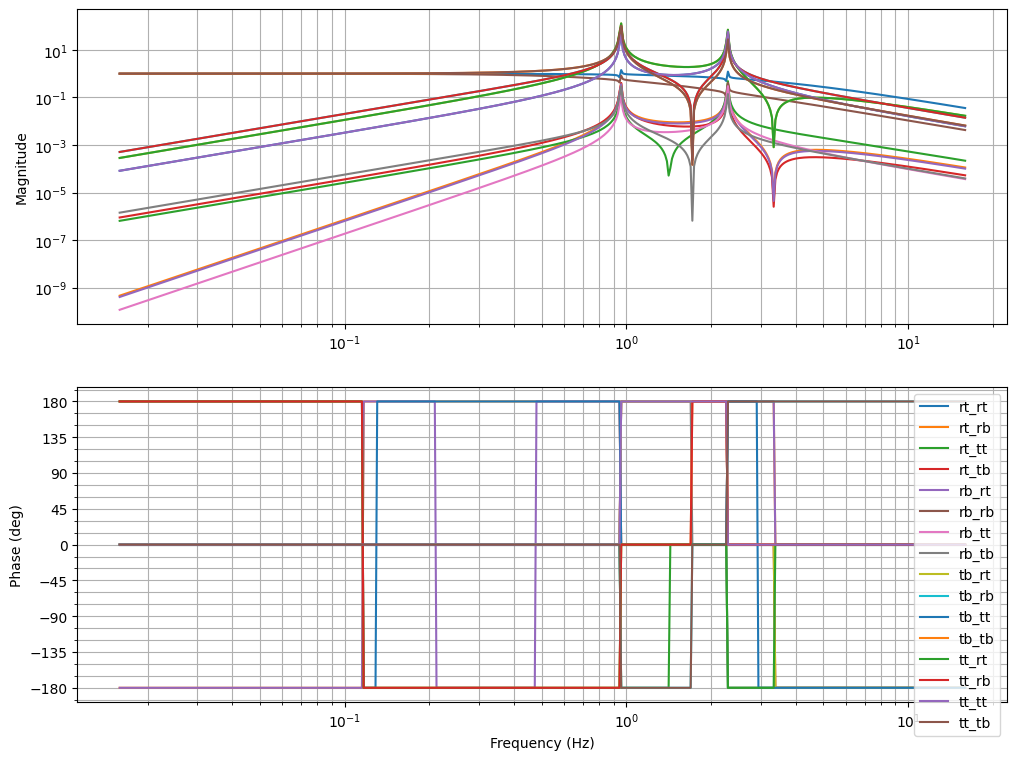

In [55]:
plt.figure(figsize=(12,9))
for i in tfs_roll.keys():
  plot_tfs(motion=i, tf_dict=tfs_roll)

In [45]:
tfs_yaw = generate_tfs(configuration='yaw')[0]

Running position points
(-q4(t) + q7(t))*A.z
Running move points
Running for Yaw and Vertical
Running rotate blocks
Running tensions
Running create blocks
Running solve kane
Running for yaw and vertical
Running linearize
simplify A B
Getting the determinant
Running get_tfs


In [37]:
tfs_yaw.keys()

dict_keys(['yt_yt', 'yt_yb', 'yt_vt', 'yt_vb', 'yb_yt', 'yb_yb', 'yb_vt', 'yb_vb', 'vb_yt', 'vb_yb', 'vb_vt', 'vb_vb', 'vt_yt', 'vt_yb', 'vt_vt', 'vt_vb'])

Generating transfer function for yaw bottom  to  yaw top


                       18                         16                       14 
- 1.2315166499362e-13⋅s   - 1.62626247260239e-10⋅s   - 7.7578908016705e-8⋅s   
──────────────────────────────────────────────────────────────────────────────
                 4 ⎛                      16                         14       
                s ⋅⎝1.52356089396504e-15⋅s   + 2.96172456462388e-12⋅s   + 2.32

                       12                        10                         8 
- 1.56775235286223e-5⋅s   - 0.00111072072017497⋅s   - 0.000860414055696748⋅s  
──────────────────────────────────────────────────────────────────────────────
                 12                        10                         8       
612405287683e-9⋅s   + 9.40323296379701e-7⋅s   + 0.000205276144219493⋅s  + 0.02

                        6                         4                         2 
- 0.000147001841794559⋅s  - 4.52840839749297e-17⋅s  - 3.60679093404118e-19⋅s  
──────────────────────────────────────────────────

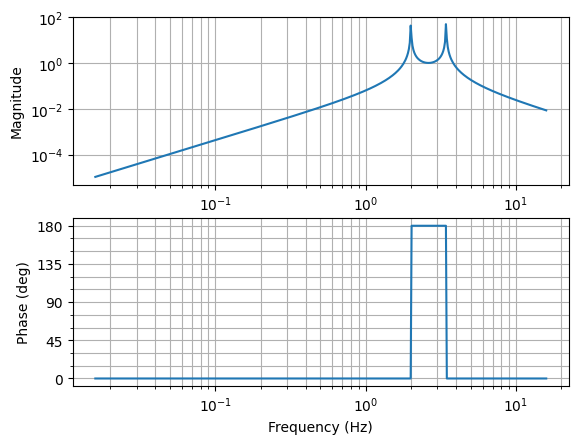

In [46]:
plot_tfs(motion='yb_yt', tf_dict=tfs_yaw)

Generating transfer function for yaw top  to  yaw top


                      18                         16                        14 
5.30460002772661e-13⋅s   + 8.12599826466219e-10⋅s   + 4.82204045935066e-7⋅s   
──────────────────────────────────────────────────────────────────────────────
            4 ⎛                      16                         14            
           s ⋅⎝1.52356089396504e-15⋅s   + 2.96172456462388e-12⋅s   + 2.3261240

                        12                       10                    8      
+ 0.000138150994160686⋅s   + 0.0190559393208364⋅s   + 1.0148237181924⋅s  + 0.7
──────────────────────────────────────────────────────────────────────────────
            12                        10                         8            
5287683e-9⋅s   + 9.40323296379701e-7⋅s   + 0.000205276144219493⋅s  + 0.0228487

                6                      4                         2            
83890202001027⋅s  + 0.133819551607544⋅s  + 3.60679093404118e-19⋅s  - 8.2255950
──────────────────────────────────────────────────

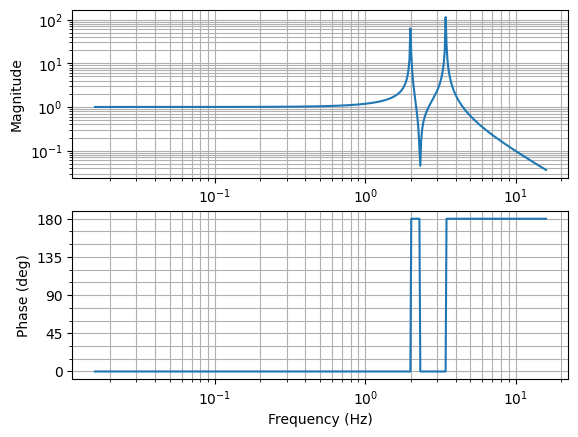

In [47]:
plot_tfs(motion='yt_yt', tf_dict=tfs_yaw)

Generating transfer function for yaw top  to  yaw top
Generating transfer function for yaw top  to  yaw bottom
Generating transfer function for yaw bottom  to  yaw top
Generating transfer function for yaw bottom  to  yaw bottom
Generating transfer function for vertical top  to  vertical top
Generating transfer function for vertical top  to  vertical bottom
Generating transfer function for vertical bottom  to  vertical top
Generating transfer function for vertical bottom  to  vertical bottom


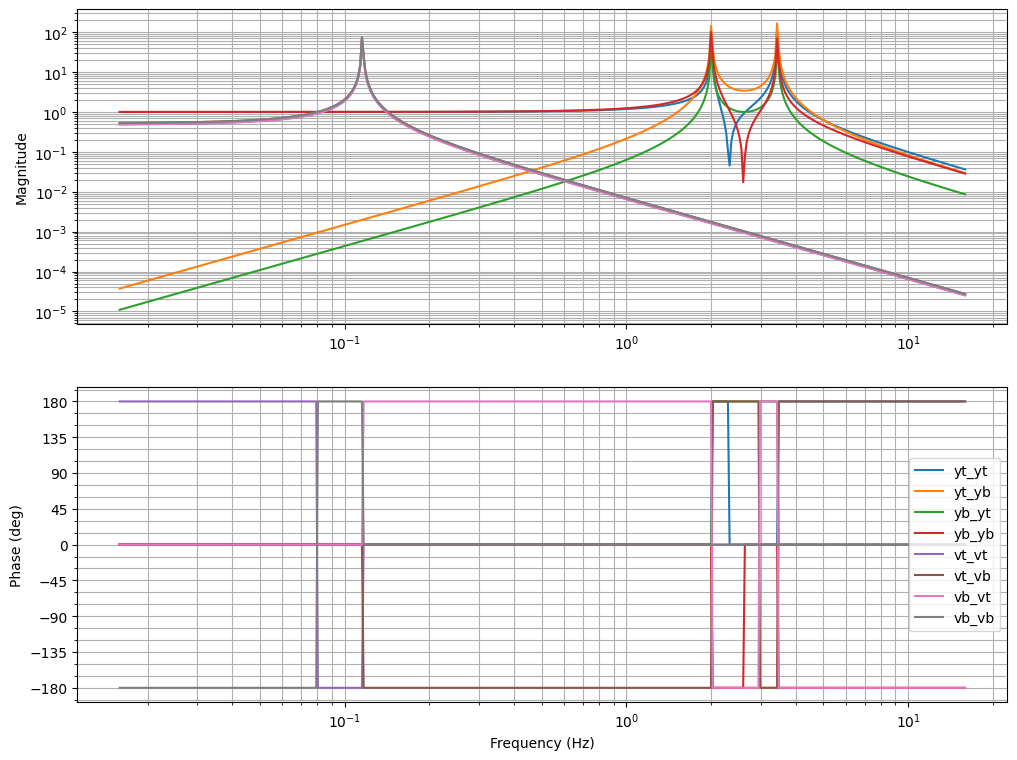

In [57]:
plt.figure(figsize=(12,9))
for i in ['yt_yt', 'yt_yb', 'yb_yt', 'yb_yb', 'vt_vt', 'vt_vb', 'vb_vt', 'vb_vb']:
  plot_tfs(motion=i, tf_dict=tfs_yaw)

Generating transfer function for pitch top  to  length top
Generating transfer function for roll top  to  transverse top
Generating transfer function for pitch bottom  to  length bottom
Generating transfer function for roll bottom  to  transverse bottom


                       128                          126                       
7.13862932275186e-133⋅s    - 1.21927751764319e-128⋅s    + 1.01566058290634e-12
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

   124                          123                         122               
4⋅s    - 5.69393224211851e-145⋅s    - 5.4969633448474e-121⋅s    + 2.8029390830
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

           121                          120                          119      
4002e-140⋅s    + 2.17257939777958e-117⋅s    - 3.89115337071573e-136⋅s    - 6.6
──────────────────────────────────────────────────

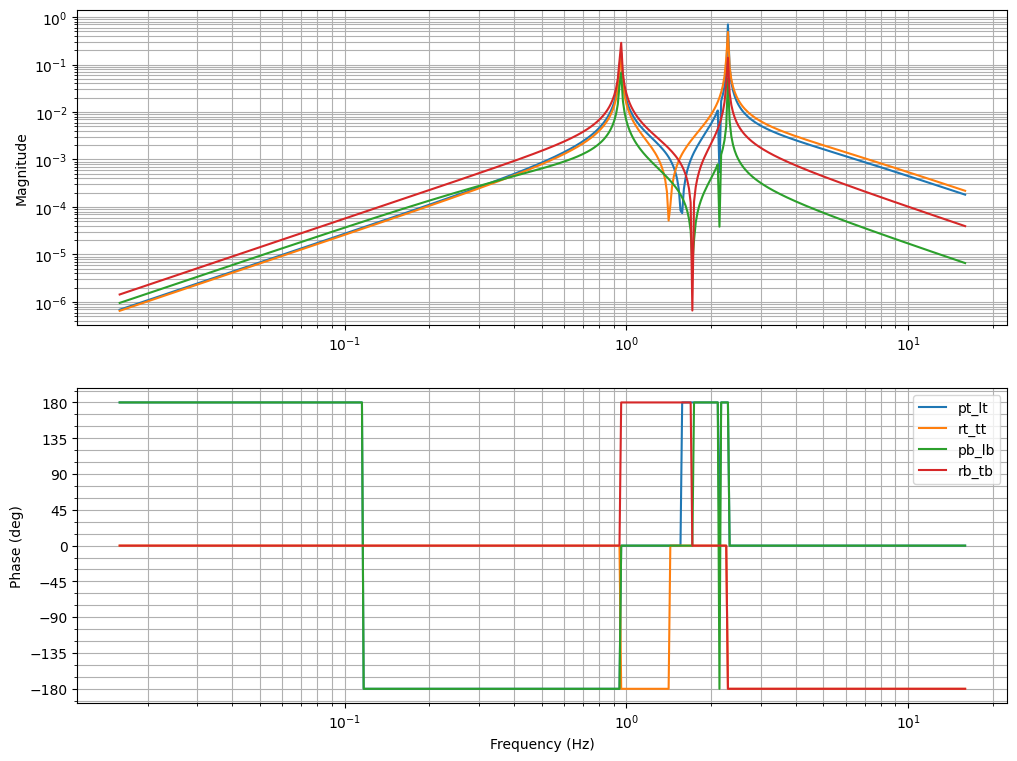

In [61]:
plt.figure(figsize=(12,9))
plot_tfs(motion='pt_lt', tf_dict=tfs_pitch)
plot_tfs(motion='rt_tt', tf_dict=tfs_roll)
plot_tfs(motion='pb_lb', tf_dict=tfs_pitch)
plot_tfs(motion='rb_tb', tf_dict=tfs_roll)
